# Python для анализа данных

*Алла Тамбовцева, НИУ ВШЭ*

Дополнения: *Татьяна Рогович, НИУ ВШЭ*

## Web-scraping

Мы уже немного познакомились со структурой html-файлов, теперь попробуем выгрузить информацию из реальной страницы, а точнее, с реального сайта [nplus1.ru](https://nplus1.ru/).

**Наша задача:** выгрузить недавние новости в датафрейм `pandas`, чтобы потом сохранить все в csv-файл.

Сначала сгрузим весь html-код страницы и сохраним его в отдельную переменную. Для этого нам понадобится библиотека `requests`. Импортируем её:

In [1]:
import requests

Сохраним ссылку на главную страницу сайта в переменную `url` для удобства и выгрузим страницу. (Разумеется, это будет работать при подключении к интернету. Если соединение будет отключено, Python выдаст `NewConnectionError`).

In [2]:
url = 'https://nplus1.ru/' # сохраняем
page = requests.get(url) # загружаем страницу по ссылке

Если мы просто посмотрим на объект, мы ничего особенного не увидим:

In [3]:
page  # response 200 - страница загружена

<Response [200]>

Импортируем функцию `BeautifulSoup` из библиотеки `bs4` (от *beautifulsoup4*) и заберём со страницы `page` код html в виде текста. 

In [4]:
from bs4 import BeautifulSoup  # не спрашивайте, почему BeautifulSoup

In [5]:
soup = BeautifulSoup(page.text, 'lxml')

Если выведем `soup` на экран, мы увидим то же самое, что в режиме разработчика или в режиме происмотра исходного кода (`view-source` через *Ctrl+U* в Google Chrome).

In [6]:
soup

<!DOCTYPE html>
<html class="no-js bg-fixed " lang="" style="background-image:url(https://nplus1.ru/images/2019/11/11/e09a85d3cfa248ef29fb31f6b05e532d.jpg)">
<head>
<meta charset="utf-8"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<link href="apple-touch-icon.png" rel="apple-touch-icon"/>
<meta content="yes" name="apple-mobile-web-app-capable"/>
<meta content="black" name="apple-mobile-web-app-status-bar-style"/>
<link href="https://nplus1.ru" rel="canonical"/>
<title>N+1: научные статьи, новости, открытия</title>
<!-- for Google -->
<meta content="N+1: научные статьи, новости, открытия" name="description"/>
<meta content="" name="author"/>
<meta content="" name="copyright"/>
<!-- for Facebook -->
<meta content="N+1: научные статьи, новости, открытия" property="og:title"/>
<meta content="https://nplus1.ru/i/logo.png" property="og:image"/>
<meta content="https://nplus1.ru" property="og:url"/>
<meta conten

Для просмотра выглядит не очень удобно.  «Причешем» наш `soup` – воспользуемся методом `.prettify()` в сочетании с функцией `print()`.

In [7]:
print(soup.prettify())

<!DOCTYPE html>
<html class="no-js bg-fixed " lang="" style="background-image:url(https://nplus1.ru/images/2019/11/11/e09a85d3cfa248ef29fb31f6b05e532d.jpg)">
 <head>
  <meta charset="utf-8"/>
  <meta content="ie=edge" http-equiv="x-ua-compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <link href="apple-touch-icon.png" rel="apple-touch-icon"/>
  <meta content="yes" name="apple-mobile-web-app-capable"/>
  <meta content="black" name="apple-mobile-web-app-status-bar-style"/>
  <link href="https://nplus1.ru" rel="canonical"/>
  <title>
   N+1: научные статьи, новости, открытия
  </title>
  <!-- for Google -->
  <meta content="N+1: научные статьи, новости, открытия" name="description"/>
  <meta content="" name="author"/>
  <meta content="" name="copyright"/>
  <!-- for Facebook -->
  <meta content="N+1: научные статьи, новости, открытия" property="og:title"/>
  <meta content="https://nplus1.ru/i/logo.png" property="og:image"/>
  <meta content="https://npl

В такой выдаче ориентироваться гораздо удобнее (но при желании, то же можно увидеть в браузере, на большом экране).

Чтобы сгрузить все новости с главной страницы сайта, нужно собрать все ссылки на страницы с этими новостями. Ссылки в html-файле всегда заключены в тэг `<a></a>` и имеют атрибут `href`. Посмотрим на кусочки кода, соответствующие всем ссылкам на главной странице сайта.

Сначала посмотрим, что возвращается по поиску всех ссылок.

In [8]:
for link in soup.find_all('a'):
    print(link)

<a class="action-menu pull-left" href="#"><i class="icon icon-navicon"></i></a>
<a class="link-logo" href="/"><img src="/i/logo-mobile.png"/></a>
<a class="action-search pull-right" href="#"><i class="icon icon-search"></i></a>
<a class="action-search-close" href="#">×</a>
<a class="" href="/rubric/astronomy">Астрономия</a>
<a class="" href="/rubric/physics">Физика</a>
<a class="" href="/rubric/biology">Биология</a>
<a class="" href="/rubric/robots-drones">Роботы и дроны</a>
<a class="" href="/theme/nobelprize">Нобелевская премия</a>
<a class="" href="/theme/oops">Научные закрытия</a>
<a class="" href="/theme/hayabusa">Приключения «Хаябусы-2»</a>
<a class="" href="/theme/art-of-integration">Интегрирование — искусство</a>
<a class="link-logo" href="/"></a>
<a class="action-search-close" href="#">×</a>
<a class="" href="/rubric/astronomy">Астрономия</a>
<a class="" href="/rubric/physics">Физика</a>
<a class="" href="/rubric/biology">Биология</a>
<a class="" href="/rubric/robots-drones">Р

Здесь гораздо больше, чем нам нужно. Оставим только те, у которых есть атрибут 'href'

In [9]:
for link in soup.find_all('a'):
    print(link.get('href'))

#
/
#
#
/rubric/astronomy
/rubric/physics
/rubric/biology
/rubric/robots-drones
/theme/nobelprize
/theme/oops
/theme/hayabusa
/theme/art-of-integration
/
#
/rubric/astronomy
/rubric/physics
/rubric/biology
/rubric/robots-drones
#
/theme/nobelprize
/theme/oops
/theme/hayabusa
/theme/art-of-integration
https://nplus1.ru/blog/2019/11/08/oqbqbo
https://nplus1.ru/blog/2019/11/08/oqbqbo
https://nplus1.ru/blog/2019/11/08/difficult-oil
https://nplus1.ru/blog/2019/11/07/nature-150
https://nplus1.ru/blog/2019/11/07/russian-school-supernova
https://nplus1.ru/blog/2019/11/07/henry-the-fifth-part-two
https://nplus1.ru/blog/2019/11/07/when-i-m-64
https://nplus1.ru/blog/2019/11/06/google-fitbit
https://nplus1.ru/blog/2019/11/05/13-thousand-bucks
https://nplus1.ru/blog/2019/11/01/access-denied
https://nplus1.ru/blog/2019/11/11/all-your-pictures
/news/2019/11/12/hanger-drive
/news/2019/11/12/take-me-home-to-the-place-i-belong
/news/2019/11/12/dog-emotion
/news/2019/11/12/metal
/news/2019/11/12/celera
/

Ссылок много. Но нам нужны только новости – ссылки, которые начинаются со слова `/news`. Добавим условие: будем выбирать только те ссылки, в которых есть `/news`. Создадим пустой список `urls` и будем добавлять в него только ссылки, которые удовлетворяют этому условию.

In [10]:
urls = []

for link in soup.find_all('a'):
    if '/news' in link.get('href'):
        urls.append(link.get('href'))
urls

['/news/2019/11/12/hanger-drive',
 '/news/2019/11/12/take-me-home-to-the-place-i-belong',
 '/news/2019/11/12/dog-emotion',
 '/news/2019/11/12/metal',
 '/news/2019/11/12/celera',
 '/news/2019/11/12/cretaceous-pollinators',
 '/news/2019/11/12/Ebola-vaccine-approval',
 '/news/2019/11/12/quantum-peptide',
 '/news/2019/11/12/carlGustaf',
 '/news/2019/11/11/mouse-deer-is-alive',
 '/news/2019/11/11/genes-stratification',
 '/news/2019/11/11/maternal-odor',
 '/news/2019/11/11/falcon-first-fairing-reuse',
 '/news/2019/11/07/boars-and-truffles',
 '/news/2019/11/11/svch',
 '/news/2019/11/11/girls-and-boys',
 '/news/2019/11/11/slippery-ice',
 '/news/2019/11/11/robotic-hands',
 '/news/2019/11/11/thermoplastic',
 '/news/2019/11/11/fake-rhino',
 '/news/2019/11/08/ammonia-in-DC-electric-field',
 '/news/2019/11/08/wigner-compressibility',
 '/news/2019/11/06/cell-sensor',
 '/news/2019/11/06/ThH10',
 '/news/2019/11/11/genes-stratification',
 '/news/2019/11/08/silk-sensor-patch-for-sweat-analysis',
 '/news

Ссылки, которые у нас есть в списке `urls`, относительные: они неполные, начало ссылки (название сайта) отсутствует. Давайте превратим их в абсолютные ‒ склеим с ссылкой https://nplus1.ru.

In [11]:
full_urls = ['https://nplus1.ru' + url for url in urls]
full_urls

['https://nplus1.ru/news/2019/11/12/hanger-drive',
 'https://nplus1.ru/news/2019/11/12/take-me-home-to-the-place-i-belong',
 'https://nplus1.ru/news/2019/11/12/dog-emotion',
 'https://nplus1.ru/news/2019/11/12/metal',
 'https://nplus1.ru/news/2019/11/12/celera',
 'https://nplus1.ru/news/2019/11/12/cretaceous-pollinators',
 'https://nplus1.ru/news/2019/11/12/Ebola-vaccine-approval',
 'https://nplus1.ru/news/2019/11/12/quantum-peptide',
 'https://nplus1.ru/news/2019/11/12/carlGustaf',
 'https://nplus1.ru/news/2019/11/11/mouse-deer-is-alive',
 'https://nplus1.ru/news/2019/11/11/genes-stratification',
 'https://nplus1.ru/news/2019/11/11/maternal-odor',
 'https://nplus1.ru/news/2019/11/11/falcon-first-fairing-reuse',
 'https://nplus1.ru/news/2019/11/07/boars-and-truffles',
 'https://nplus1.ru/news/2019/11/11/svch',
 'https://nplus1.ru/news/2019/11/11/girls-and-boys',
 'https://nplus1.ru/news/2019/11/11/slippery-ice',
 'https://nplus1.ru/news/2019/11/11/robotic-hands',
 'https://nplus1.ru/ne

Теперь наша задача сводится к следующему: изучить одну страницу с новостью, научиться из нее вытаскивать текст и всю необходимую информацию, а потом применить весь набор действий к каждой ссылке из `full_urls` в цикле. Посмотрим на новость с индексом 1, у вас может быть другая, новости обновляются.

In [12]:
url0 = full_urls[1]

page0 = requests.get(url0)
soup0 = BeautifulSoup(page0.text, 'lxml')

In [13]:
soup0

<!DOCTYPE html>
<html class="no-js bg-fixed _no-bg" lang="" style="background-image:url(https://nplus1.ru/images/2019/11/12/ea3b95ca62a4ae37d6d719fff4c8227e.jpg)">
<head>
<meta charset="utf-8"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<link href="apple-touch-icon.png" rel="apple-touch-icon"/>
<meta content="yes" name="apple-mobile-web-app-capable"/>
<meta content="black" name="apple-mobile-web-app-status-bar-style"/>
<link href="https://nplus1.ru/news/2019/11/12/take-me-home-to-the-place-i-belong" rel="canonical"/>
<title>Ученые помогли потерявшимся в ядерном бункере муравьям вернуться домой</title>
<meta content="2019-11-12" itemprop="datePublished"/>
<meta content="Николай Воронцов" name="mediator_author"/>
<!-- amp page -->
<link href="https://nplus1.ru/news/2019/11/12/take-me-home-to-the-place-i-belong/amp" rel="amphtml"/>
<!-- for Google -->
<meta content="Муравьи в условиях отсутствия пищи питали

В коде каждой страницы с новостью есть часть с мета-информацией: датой, именем автора и проч. Такая информация окружена тэгом `<meta></meta>`. Посмотрим:

In [14]:
soup0.find_all('meta')

[<meta charset="utf-8"/>,
 <meta content="ie=edge" http-equiv="x-ua-compatible"/>,
 <meta content="width=device-width, initial-scale=1" name="viewport"/>,
 <meta content="yes" name="apple-mobile-web-app-capable"/>,
 <meta content="black" name="apple-mobile-web-app-status-bar-style"/>,
 <meta content="2019-11-12" itemprop="datePublished"/>,
 <meta content="Николай Воронцов" name="mediator_author"/>,
 <meta content="Муравьи в условиях отсутствия пищи питались трупами сородичей." name="description"/>,
 <meta content="Николай Воронцов" name="author"/>,
 <meta content="" name="copyright"/>,
 <meta content="Ученые помогли потерявшимся в ядерном бункере муравьям вернуться домой" property="og:title"/>,
 <meta content="https://nplus1.ru/images/2019/11/12/f4088e0e90dcbc774de423b31bed1b05.jpg" property="og:image"/>,
 <meta content="https://nplus1.ru/news/2019/11/12/take-me-home-to-the-place-i-belong" property="og:url"/>,
 <meta content="Муравьи в условиях отсутствия пищи питались трупами сородиче

Из этого списка нам нужны части с именем автора, датой, заголовком и кратким описанием. Воспользуемся поиском по атрибуту `name`. Передадим функции `find_all()` в качестве аргумента словарь с названием и значением атрибута: 

In [15]:
soup0.find_all('meta', {'name' : 'author'}) # например, автор

[<meta content="Николай Воронцов" name="author"/>]

Теперь выберем единственный элемент полученного списка (с индексом 0):

In [16]:
soup0.find_all('meta', {'name' : 'author'})[0]

<meta content="Николай Воронцов" name="author"/>

Нам нужно вытащить из этого объекта `content` – имя автора. Посмотрим на атрибуты:

In [17]:
soup0.find_all('meta', {'name' : 'author'})[0].attrs

{'name': 'author', 'content': 'Николай Воронцов'}

Как получить отсюда `content`? Очень просто, ведь это словарь! А доставать из словаря значение по ключу мы умеем.

In [18]:
author = soup0.find_all('meta', {'name' : 'author'})[0].attrs['content']
author

'Николай Воронцов'

Аналогичным образом извлечем дату, заголовок и описание.

In [19]:
date = soup0.find_all('meta', {'itemprop' : 'datePublished'})[0].attrs['content']
title = soup0.find_all('meta', {'property' : 'og:title'})[0].attrs['content']
description = soup0.find_all('meta', {'name' : 'description'})[0].attrs['content']

In [20]:
print(date)
print(title)
print(description)

2019-11-12
Ученые помогли потерявшимся в ядерном бункере муравьям вернуться домой
Муравьи в условиях отсутствия пищи питались трупами сородичей.


Осталось вытащить рубрики и сложность текста. Если мы посмотрим на исходный код страницы, мы увидим, что нужная нам информация находится в тэгах `<p></p>`:

In [21]:
soup0.find_all('p')

[<p class="table">
 <a data-rubric="zoology" href="/rubric/zoology">Зоология</a>
 </p>, <p class="table">
 <a href="/news/2019/11/12">
 <time content="2019-11-12" data-unix="1573572014" itemprop="datePublished">
 <span>18:20</span>
 <span>12 Нояб. 2019</span>
 </time>
 </a>
 </p>, <p class="table">
 <a href="/difficult/2.2">
 <span>Сложность</span>
 <span class="difficult-value">2.2</span>
 </a>
 </p>, <p class="title">Муравьи поднимаются до потолка, однако затем расходятся в стороны и самостоятельно не доходят до вентиляционной трубы</p>, <p class="credits">Wojciech Czechowski et al. / Journal of Hymenoptera Research, 2019</p>, <p>Польские ученые помогли вернуться в свое гнездо муравьям, упавшим в подземный заброшенный бункер через вентиляцию. Авторы исследования, <a href="https://jhr.pensoft.net/article/38972/element/8/27354//" rel="nofollow" target="_blank">опубликованного</a> в <i>Journal of Hymenoptera Research, </i>вкопали в муравейник, построенный упавшими в бункер муравьями, ко

Выберем из полученного списка первый элемент и найдем в нем все тэги `<a>`:

In [22]:
soup0.find_all('p')[0].find_all('a')

[<a data-rubric="zoology" href="/rubric/zoology">Зоология</a>]

Получился список из одного элемента. Применим списковые включения – вытащим из каждого элемента (их могло бы быть больше) текст и поместим его в новый список `rubrics`.

In [23]:
rubrics = [r.text for r in soup0.find_all('p')[0].find_all('a')]
rubrics

['Зоология']

Осталась только сложность. Возьмем соответствующий кусок кода:

In [24]:
soup0.find_all('span', {'class' : 'difficult-value'})

[<span class="difficult-value">2.2</span>]

И выберем оттуда текст.

In [25]:
diff = soup0.find_all('span', {'class' : 'difficult-value'})[0].text
diff

'2.2'

Теперь перейдем к тексту самой новости. Как можно заметить, текст сохранен в абзацах `<p></p>`, причем безо всяких атрибутов. Сообщим Python, что нас интересуют куски с пустым атрибутом `class`:

In [26]:
text_list = soup0.find_all('p', {'class' : None})

In [27]:
text_list

[<p>Польские ученые помогли вернуться в свое гнездо муравьям, упавшим в подземный заброшенный бункер через вентиляцию. Авторы исследования, <a href="https://jhr.pensoft.net/article/38972/element/8/27354//" rel="nofollow" target="_blank">опубликованного</a> в <i>Journal of Hymenoptera Research, </i>вкопали в муравейник, построенный упавшими в бункер муравьями, конструкцию из досок, по которой насекомые смогли вернуться в родное гнездо. Также ученые выяснили, что муравьи в условиях отсутствия пищи питались трупами сородичей.</p>,
 <p>Войцех Чеховский из (Wojciech Czechowsk) и его коллеги из Польши и Финляндии изначально наблюдали за летучими мышами, обитающими в бункере «Специальный объект 3003 Темплево», который использовался для хранения ядерного оружия с конца 60-х до начала 90-х годов. В 2013 году зоологи <a href="https://nplus1.ru/news/2016/09/05/ant-dystopia" target="_blank">обнаружили</a> в одной из комнат бункера странную колонию малых лесных муравьев (<i>Formica polyctena</i>). 

«Выцепим» все тексты (без тэгов) из полученного списка:

In [28]:
for t in text_list:
    print(t)
    break

<p>Польские ученые помогли вернуться в свое гнездо муравьям, упавшим в подземный заброшенный бункер через вентиляцию. Авторы исследования, <a href="https://jhr.pensoft.net/article/38972/element/8/27354//" rel="nofollow" target="_blank">опубликованного</a> в <i>Journal of Hymenoptera Research, </i>вкопали в муравейник, построенный упавшими в бункер муравьями, конструкцию из досок, по которой насекомые смогли вернуться в родное гнездо. Также ученые выяснили, что муравьи в условиях отсутствия пищи питались трупами сородичей.</p>


In [29]:
for t in text_list:
    print(t.text)
    break

Польские ученые помогли вернуться в свое гнездо муравьям, упавшим в подземный заброшенный бункер через вентиляцию. Авторы исследования, опубликованного в Journal of Hymenoptera Research, вкопали в муравейник, построенный упавшими в бункер муравьями, конструкцию из досок, по которой насекомые смогли вернуться в родное гнездо. Также ученые выяснили, что муравьи в условиях отсутствия пищи питались трупами сородичей.


In [30]:
text = [t.text for t in text_list]
text

['Польские ученые помогли вернуться в\xa0свое гнездо муравьям, упавшим в подземный заброшенный бункер через вентиляцию. Авторы исследования, опубликованного в\xa0Journal of\xa0Hymenoptera Research, вкопали в муравейник, построенный упавшими в бункер муравьями, конструкцию из досок, по\xa0которой насекомые смогли вернуться в\xa0родное гнездо. Также ученые выяснили, что муравьи в\xa0условиях отсутствия пищи питались трупами сородичей.',
 'Войцех Чеховский\xa0из (Wojciech Czechowsk) и\xa0его коллеги из\xa0Польши и\xa0Финляндии изначально наблюдали за\xa0летучими мышами, обитающими в\xa0бункере «Специальный объект 3003\xa0Темплево», который использовался для хранения ядерного оружия с\xa0конца 60-х до\xa0начала 90-х годов. В\xa02013 году зоологи\xa0обнаружили в\xa0одной из\xa0комнат бункера странную колонию малых лесных муравьев (Formica polyctena). Оказалось, что это рабочие муравьи, упавшие в\xa0трубу вентиляции с\xa0поверхности\xa0— прямо над бункером под корнями дерева исследователи об

Склеим все элементы списка `text` через пробел:

In [31]:
final_text = ' '.join(text)
final_text

'Польские ученые помогли вернуться в\xa0свое гнездо муравьям, упавшим в подземный заброшенный бункер через вентиляцию. Авторы исследования, опубликованного в\xa0Journal of\xa0Hymenoptera Research, вкопали в муравейник, построенный упавшими в бункер муравьями, конструкцию из досок, по\xa0которой насекомые смогли вернуться в\xa0родное гнездо. Также ученые выяснили, что муравьи в\xa0условиях отсутствия пищи питались трупами сородичей. Войцех Чеховский\xa0из (Wojciech Czechowsk) и\xa0его коллеги из\xa0Польши и\xa0Финляндии изначально наблюдали за\xa0летучими мышами, обитающими в\xa0бункере «Специальный объект 3003\xa0Темплево», который использовался для хранения ядерного оружия с\xa0конца 60-х до\xa0начала 90-х годов. В\xa02013 году зоологи\xa0обнаружили в\xa0одной из\xa0комнат бункера странную колонию малых лесных муравьев (Formica polyctena). Оказалось, что это рабочие муравьи, упавшие в\xa0трубу вентиляции с\xa0поверхности\xa0— прямо над бункером под корнями дерева исследователи обнаруж

Все здорово, только мешают артефакты форматирования из html. Заменим их на пробелы с помощью метода `.sub` библиотеки regular expression:

In [32]:
import re
final_text = re.sub(r'[^\w\ \S]', ' ', final_text)
final_text

'Польские ученые помогли вернуться в свое гнездо муравьям, упавшим в подземный заброшенный бункер через вентиляцию. Авторы исследования, опубликованного в Journal of Hymenoptera Research, вкопали в муравейник, построенный упавшими в бункер муравьями, конструкцию из досок, по которой насекомые смогли вернуться в родное гнездо. Также ученые выяснили, что муравьи в условиях отсутствия пищи питались трупами сородичей. Войцех Чеховский из (Wojciech Czechowsk) и его коллеги из Польши и Финляндии изначально наблюдали за летучими мышами, обитающими в бункере «Специальный объект 3003 Темплево», который использовался для хранения ядерного оружия с конца 60-х до начала 90-х годов. В 2013 году зоологи обнаружили в одной из комнат бункера странную колонию малых лесных муравьев (Formica polyctena). Оказалось, что это рабочие муравьи, упавшие в трубу вентиляции с поверхности — прямо над бункером под корнями дерева исследователи обнаружили муравейник.   Теперь эта же группа исследователей опубликовала

И последняя проблема - в на текст проникла еще метадата (посмотрите в конец файла). Но мы видим, что в тектсе есть подпись автора и мы можем отрезать все, что ниже нее включительно.

In [33]:
final_text[:final_text.find(author)-1] # захватим еще пробел с помощью -1

'Польские ученые помогли вернуться в свое гнездо муравьям, упавшим в подземный заброшенный бункер через вентиляцию. Авторы исследования, опубликованного в Journal of Hymenoptera Research, вкопали в муравейник, построенный упавшими в бункер муравьями, конструкцию из досок, по которой насекомые смогли вернуться в родное гнездо. Также ученые выяснили, что муравьи в условиях отсутствия пищи питались трупами сородичей. Войцех Чеховский из (Wojciech Czechowsk) и его коллеги из Польши и Финляндии изначально наблюдали за летучими мышами, обитающими в бункере «Специальный объект 3003 Темплево», который использовался для хранения ядерного оружия с конца 60-х до начала 90-х годов. В 2013 году зоологи обнаружили в одной из комнат бункера странную колонию малых лесных муравьев (Formica polyctena). Оказалось, что это рабочие муравьи, упавшие в трубу вентиляции с поверхности — прямо над бункером под корнями дерева исследователи обнаружили муравейник.   Теперь эта же группа исследователей опубликовала

In [34]:
final_text = final_text[:final_text.find(author)-1]

Не прошло и двух пар, как мы разобрались со всем :) Теперь осталось совсем чуть-чуть. Написать готовую функцию для всех проделанных нами действий и применить ее в цикле для всех ссылок в списке `full_urls`. Напишем! Аргументом функции будет ссылка на новость, а возвращать она будет текст новости и всю необходимую информацию (дата, автор, сложность и проч.). Скопируем все строки кода выше.

In [35]:
def GetNews(url0):
    """
    Returns a tuple with url0, date, author, description, title, final_text, rubrics, diff.
    Parameters:
    
    url0 is a link to the news (string)
    """
    page0 = requests.get(url0)
    soup0 = BeautifulSoup(page0.text, 'lxml')
    author = soup0.find_all('meta', {'name' : 'author'})[0].attrs['content']
    date = soup0.find_all('meta', {'itemprop' : 'datePublished'})[0].attrs['content']
    title = soup0.find_all('meta', {'property' : 'og:title'})[0].attrs['content']
    description = soup0.find_all('meta', {'name' : 'description'})[0].attrs['content']
    rubrics = [r.text for r in soup0.find_all('p')[0].find_all('a')]
    diff = soup0.find_all('span', {'class' : 'difficult-value'})[0].text
    text_list = soup0.find_all('p', {'class' : None})
    text = [t.text for t in text_list]
    final_text = ' '.join(text)
    final_text = re.sub(r'[^\w\ \S]', ' ', final_text)
    final_text = final_text[:final_text.find(author)-1]
    
    return url0, date, author, description, title, final_text, rubrics, diff

Уфф. Осталось применить ее в цикле. Но давайте не будем спешить: импортируем функцию `sleep` для задержки, чтобы на каждой итерации цикла, прежде чем перейти к следующей новости, Python ждал несколько секунд. Во-первых, это нужно, чтобы сайт «не понял», чтобы мы его грабим, да еще автоматически. Во-вторых, с небольшой задержкой всегда есть гарантия, что страница прогрузится (сейчас это пока не очень важно, но особенно актуально будет, когда будем обсуждать встраивание в браузер с Selenium). Приступим.

In [36]:
from time import sleep

In [37]:
news = [] # это будет список из кортежей, в которых будут храниться данные по каждой новости

for link in full_urls:
    res = GetNews(link)
    news.append(res)
    sleep(3) # задержка в 3 секунды

Так теперь выглядит первый элемент списка:

In [38]:
news[0]

('https://nplus1.ru/news/2019/11/12/hanger-drive',
 '2019-11-12',
 'Григорий Копиев',
 ' При надувании они вызывают непроизвольный поворот человека из-за «рефлекса вешалки».',
 'Надувной пояс позволил управлять движением человека на гироскутере',
 'Японские инженеры научились управлять движениями человека на гироскутере с помощью планшета и пояса с надувными вставками. При надувании они вызывают непроизвольный поворот человека из-за «рефлекса вешалки», благодаря чему гироскутер поворачивает вместе с ним. Разработка будет представлена на конференции SIGGRAPH Asia 2019. Если на голову надеть вешалку-плечики из проволоки, голова начинает непроизвольное движение вправо или влево, в зависимости от того, как располагается вешалка. На бытовом уровне этот эффект, предположительно, известен достаточно давно, но серьезное изучение самого рефлекса и его возможных применений началось только в 2008 году, когда группа японских исследователей под руководством Хироики Каджимото (Hiroyuki Kajimoto) опу

Импортируем `pandas` и создадим датафрейм из списка кортежей: 

In [39]:
import pandas as pd

In [40]:
df = pd.DataFrame(news)

In [41]:
df.shape

(29, 8)

In [42]:
df.head(2)

,0,1,2,3,4,5,6,7
0,https://nplus1.ru/news/2019/11/12/hanger-drive,2019-11-12,Григорий Копиев,При надувании они вызывают непроизвольный пов...,Надувной пояс позволил управлять движением чел...,Японские инженеры научились управлять движения...,"[Транспорт, Мезонин]",2.3
1,https://nplus1.ru/news/2019/11/12/take-me-home...,2019-11-12,Николай Воронцов,Муравьи в условиях отсутствия пищи питались тр...,Ученые помогли потерявшимся в ядерном бункере ...,Польские ученые помогли вернуться в свое гнезд...,[Зоология],2.2


Переименуем столбцы в базе.

In [43]:
df.columns = ['link', 'date', 'author', 'desc', 'title', 'text', 'rubric', 'diffc']

In [44]:
df.head(2)

,link,date,author,desc,title,text,rubric,diffc
0,https://nplus1.ru/news/2019/11/12/hanger-drive,2019-11-12,Григорий Копиев,При надувании они вызывают непроизвольный пов...,Надувной пояс позволил управлять движением чел...,Японские инженеры научились управлять движения...,"[Транспорт, Мезонин]",2.3
1,https://nplus1.ru/news/2019/11/12/take-me-home...,2019-11-12,Николай Воронцов,Муравьи в условиях отсутствия пищи питались тр...,Ученые помогли потерявшимся в ядерном бункере ...,Польские ученые помогли вернуться в свое гнезд...,[Зоология],2.2


Теперь внесем изменения: сделаем столбец `diffc` числовым – типа *float*.

In [45]:
df['diffc'] = [float(i) for i in df.diffc]

Теперь сложность представлена в базе как количественный показатель, и описывать ее можно соответствующим образом:

In [46]:
df.diffc.describe()

count    29.000000
mean      3.689655
std       1.505548
min       1.100000
25%       2.300000
50%       3.800000
75%       4.700000
max       6.800000
Name: diffc, dtype: float64

Теперь столбец со сложностью точно числовой. Можем даже построить для него гистограмму.

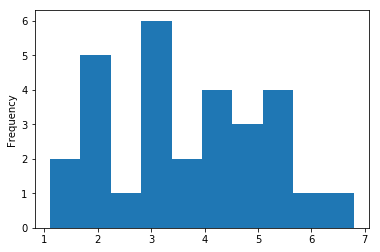

In [47]:
%matplotlib inline
df.diffc.plot.hist()

Объединим рубрики в *text* в одну строку через запятую:

In [48]:
df['rubric'] = ['|'.join(r) for r in df.rubric]

In [49]:
df.head()

,link,date,author,desc,title,text,rubric,diffc
0,https://nplus1.ru/news/2019/11/12/hanger-drive,2019-11-12,Григорий Копиев,При надувании они вызывают непроизвольный пов...,Надувной пояс позволил управлять движением чел...,Японские инженеры научились управлять движения...,Транспорт|Мезонин,2.3
1,https://nplus1.ru/news/2019/11/12/take-me-home...,2019-11-12,Николай Воронцов,Муравьи в условиях отсутствия пищи питались тр...,Ученые помогли потерявшимся в ядерном бункере ...,Польские ученые помогли вернуться в свое гнезд...,Зоология,2.2
2,https://nplus1.ru/news/2019/11/12/dog-emotion,2019-11-12,Елизавета Ивтушок,"Лучше всего дались радость, злость и грусть",Культура и опыт помогли людям распознать собач...,"Европейские ученые выяснили, что эмоции собак ...",Психология|Зоология,3.1
3,https://nplus1.ru/news/2019/11/12/metal,2019-11-12,Василий Сычев,Топливом из металлических порошков планируется...,Европейцы занялись исследованием металлическог...,Университет Макгилла в Монреале и европейский ...,Материалы,3.1
4,https://nplus1.ru/news/2019/11/12/celera,2019-11-12,Василий Сычев,Разработка Celera 500L ведется на протяжении п...,Самолет-пуля совершил первый полет,Перспективный американский самолет Celera 500L...,Авиация,3.1


Если бы мы планировали использовать текст для предсказательных моделей, нам был для начала пришлось его стандартировать (привести к нижнему регистру, очистить от знаков препинания и стоп-слов). Давайте попробуем это сделать.

In [50]:
df['text_clean'] = df['text']

In [51]:
stop_words = ['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впрочем', 'хорошо', 'свою', 'этой', 'перед', 'иногда', 'лучше', 'чуть', 'том', 'нельзя', 'такой', 'им', 'более', 'всегда', 'конечно', 'всю', 'между']

Как обычно поэксперементируем на первой новости.

In [54]:
df.iloc[0]['text_clean']

'Японские инженеры научились управлять движениями человека на гироскутере с помощью планшета и пояса с надувными вставками. При надувании они вызывают непроизвольный поворот человека из-за «рефлекса вешалки», благодаря чему гироскутер поворачивает вместе с ним. Разработка будет представлена на конференции SIGGRAPH Asia 2019. Если на голову надеть вешалку-плечики из проволоки, голова начинает непроизвольное движение вправо или влево, в зависимости от того, как располагается вешалка. На бытовом уровне этот эффект, предположительно, известен достаточно давно, но серьезное изучение самого рефлекса и его возможных применений началось только в 2008 году, когда группа японских исследователей под руководством Хироики Каджимото (Hiroyuki Kajimoto) опубликовала статью с описанием серии экспериментов. Они выяснили, что за движение отвечает давление и сдвиг кожи с двух сторон головы, причем в большей степени за рефлекс отвечает давление в височной области.  Позднее исследователи выяснили, что схож

In [55]:
text_clean = ' '.join([word for word in df.iloc[0]['text_clean'].split() if not word in stop_words])
text_clean

'Японские инженеры научились управлять движениями человека гироскутере помощью планшета пояса надувными вставками. При надувании вызывают непроизвольный поворот человека из-за «рефлекса вешалки», благодаря чему гироскутер поворачивает вместе ним. Разработка представлена конференции SIGGRAPH Asia 2019. Если голову надеть вешалку-плечики проволоки, голова начинает непроизвольное движение вправо влево, зависимости того, располагается вешалка. На бытовом уровне эффект, предположительно, известен достаточно давно, серьезное изучение самого рефлекса возможных применений началось 2008 году, группа японских исследователей руководством Хироики Каджимото (Hiroyuki Kajimoto) опубликовала статью описанием серии экспериментов. Они выяснили, движение отвечает давление сдвиг кожи двух сторон головы, причем большей степени рефлекс отвечает давление височной области. Позднее исследователи выяснили, схожий эффект возникает давлении другие части тела, числе запястье талию. Поскольку талия гораздо удобнее

In [56]:
text_clean = text_clean.lower()
text_clean

'японские инженеры научились управлять движениями человека гироскутере помощью планшета пояса надувными вставками. при надувании вызывают непроизвольный поворот человека из-за «рефлекса вешалки», благодаря чему гироскутер поворачивает вместе ним. разработка представлена конференции siggraph asia 2019. если голову надеть вешалку-плечики проволоки, голова начинает непроизвольное движение вправо влево, зависимости того, располагается вешалка. на бытовом уровне эффект, предположительно, известен достаточно давно, серьезное изучение самого рефлекса возможных применений началось 2008 году, группа японских исследователей руководством хироики каджимото (hiroyuki kajimoto) опубликовала статью описанием серии экспериментов. они выяснили, движение отвечает давление сдвиг кожи двух сторон головы, причем большей степени рефлекс отвечает давление височной области. позднее исследователи выяснили, схожий эффект возникает давлении другие части тела, числе запястье талию. поскольку талия гораздо удобнее

А теперь давайте очистим текст от всего, что не русские буквы.

In [57]:
' '.join(re.findall(r'[а-яА-Я]+(?:-[а-яА-Я]+)*', text_clean))

'японские инженеры научились управлять движениями человека гироскутере помощью планшета пояса надувными вставками при надувании вызывают непроизвольный поворот человека из-за рефлекса вешалки благодаря чему гироскутер поворачивает вместе ним разработка представлена конференции если голову надеть вешалку-плечики проволоки голова начинает непроизвольное движение вправо влево зависимости того располагается вешалка на бытовом уровне эффект предположительно известен достаточно давно серьезное изучение самого рефлекса возможных применений началось году группа японских исследователей руководством хироики каджимото опубликовала статью описанием серии экспериментов они выяснили движение отвечает давление сдвиг кожи двух сторон головы причем большей степени рефлекс отвечает давление височной области позднее исследователи выяснили схожий эффект возникает давлении другие части тела числе запястье талию поскольку талия гораздо удобнее закрепления устройств создали пояс четырьмя надувными камерами п

Теперь складываем все это в функцию.

In [59]:
# В Питоне поиск в множествах (set) быстрее чем поиск в

stops = set(stop_words) 

def text_to_words(raw_text):
    global stops
    
    # приводим к нижнему регистру
    text_lower = raw_text.lower()
    
    # Оставляем только русские буквы и дефисы внутри слов
    text_clean = re.findall(r'[а-яА-Я]+(?:-[а-яА-Я]+)*', text_lower)
           
    # Убираем стоп-слова
    meaningful_words = ' '.join([word for word in text_clean if not word in stops])

    # Объединяем все слова вместе в одну строчку, разделяя слова пробелом, 
    # и возвращаем результат
    return meaningful_words

In [60]:
for idx in range(len(df)):
    df['text_clean'][idx] = text_to_words(df['text_clean'][idx])
    print(df.loc[idx]['text_clean'])
    break

японские инженеры научились управлять движениями человека гироскутере помощью планшета пояса надувными вставками надувании вызывают непроизвольный поворот человека из-за рефлекса вешалки благодаря чему гироскутер поворачивает вместе разработка представлена конференции голову надеть вешалку-плечики проволоки голова начинает непроизвольное движение вправо влево зависимости располагается вешалка бытовом уровне эффект предположительно известен достаточно давно серьезное изучение самого рефлекса возможных применений началось году группа японских исследователей руководством хироики каджимото опубликовала статью описанием серии экспериментов выяснили движение отвечает давление сдвиг кожи двух сторон головы причем большей степени рефлекс отвечает давление височной области позднее исследователи выяснили схожий эффект возникает давлении другие части тела числе запястье талию поскольку талия гораздо удобнее закрепления устройств создали пояс четырьмя надувными камерами позволяющими создавать давл

C:\Users\rogov\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Все работает, запускаем на всем датасете.

In [61]:
for idx in range(len(df)):
    df['text_clean'][idx] = text_to_words(df['text_clean'][idx])

C:\Users\rogov\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [62]:
df.head()

,link,date,author,desc,title,text,rubric,diffc,text_clean
0,https://nplus1.ru/news/2019/11/12/hanger-drive,2019-11-12,Григорий Копиев,При надувании они вызывают непроизвольный пов...,Надувной пояс позволил управлять движением чел...,Японские инженеры научились управлять движения...,Транспорт|Мезонин,2.3,японские инженеры научились управлять движения...
1,https://nplus1.ru/news/2019/11/12/take-me-home...,2019-11-12,Николай Воронцов,Муравьи в условиях отсутствия пищи питались тр...,Ученые помогли потерявшимся в ядерном бункере ...,Польские ученые помогли вернуться в свое гнезд...,Зоология,2.2,польские ученые помогли вернуться свое гнездо ...
2,https://nplus1.ru/news/2019/11/12/dog-emotion,2019-11-12,Елизавета Ивтушок,"Лучше всего дались радость, злость и грусть",Культура и опыт помогли людям распознать собач...,"Европейские ученые выяснили, что эмоции собак ...",Психология|Зоология,3.1,европейские ученые выяснили эмоции собак распо...
3,https://nplus1.ru/news/2019/11/12/metal,2019-11-12,Василий Сычев,Топливом из металлических порошков планируется...,Европейцы занялись исследованием металлическог...,Университет Макгилла в Монреале и европейский ...,Материалы,3.1,университет макгилла монреале европейский авиа...
4,https://nplus1.ru/news/2019/11/12/celera,2019-11-12,Василий Сычев,Разработка Celera 500L ведется на протяжении п...,Самолет-пуля совершил первый полет,Перспективный американский самолет Celera 500L...,Авиация,3.1,перспективный американский самолет разрабатыва...


In [64]:
df.loc[0]['text_clean']

'японские инженеры научились управлять движениями человека гироскутере помощью планшета пояса надувными вставками надувании вызывают непроизвольный поворот человека из-за рефлекса вешалки благодаря чему гироскутер поворачивает вместе разработка представлена конференции голову надеть вешалку-плечики проволоки голова начинает непроизвольное движение вправо влево зависимости располагается вешалка бытовом уровне эффект предположительно известен достаточно давно серьезное изучение самого рефлекса возможных применений началось году группа японских исследователей руководством хироики каджимото опубликовала статью описанием серии экспериментов выяснили движение отвечает давление сдвиг кожи двух сторон головы причем большей степени рефлекс отвечает давление височной области позднее исследователи выяснили схожий эффект возникает давлении другие части тела числе запястье талию поскольку талия гораздо удобнее закрепления устройств создали пояс четырьмя надувными камерами позволяющими создавать дав

In [63]:
df.loc[20]['text_clean']

'ученые сеульского университета исследовали поведение молекулы аммиака матрице аргона сильных электрических полях напряженностью миллионов вольт метр оказалось полях напряженностью выше миллионов вольт метр переходы колебательными уровнями благодаря которым молекула могла выворачиваться наблюдаются внешнее поле ориентировало молекулу дестабилизирует вывернутое состояние исследование которое поможет понять влияние электрических полей поведение молекул опубликовано журнале молекула аммиака представляет собой треногу вершине которой находится атом азота подобно зонту ветру выворачиваться атом азота случае оказывается другую сторону плоскости которой находятся атомы водорода энергетический барьер который разделяет этих идентичных стационарных состояния достаточно высокий около двух тысяч обратных сантиметров однако колебания равно наблюдаются энергии недостаточно молекула способна туннелировать сквозь барьер переходить инвертированное состояние изучения нестабильных частиц отдельных молеку

Всё! Сохраняем датафрейм в файл.

In [63]:
df.to_csv('nplus-news.сsv')